### 1. Load data and conduct data analytics

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv("DAB_TPS.csv", index_col=0)

# Print initial shape
print("Initial shape:", df.shape)




#------------------------------------------------------------------------------------------------
# Conduct basic data cleaning
#------------------------------------------------------------------------------------------------

# Filter out data where "Validity" column is 0
df_filtered = df[df['Validity'] != 0]

# Sum the specified columns
sum_columns = ["vp_t1", "vp_t2", "vp_t3", "vp_t4", "vs_t1", "vs_t2", "vs_t3", "vs_t4"]
df_filtered['total_ZVS'] = df_filtered[sum_columns].sum(axis=1)

# Filter out samples with odd sum values
df_final = df_filtered[df_filtered['total_ZVS'] % 2 == 0]

# Analyze outliers in the 'ipk2pk' feature

# Calculate basic statistics
ipk2pk = df_final['ipk2pk']
mean_ipk2pk = ipk2pk.mean()
std_ipk2pk = ipk2pk.std()

# Define outlier threshold (e.g., 3 standard deviations from mean)
upper_threshold = mean_ipk2pk + 3 * std_ipk2pk
lower_threshold = mean_ipk2pk - 3 * std_ipk2pk

# Identify outliers
outliers = df_final[(ipk2pk > upper_threshold) | (ipk2pk < lower_threshold)]

print(f"ipk2pk mean: {mean_ipk2pk:.3f}, std: {std_ipk2pk:.3f}")
print(f"Outlier threshold: < {lower_threshold:.3f} or > {upper_threshold:.3f}")
print(f"Number of outliers in ipk2pk: {outliers.shape[0]}")


Initial shape: (5291, 18)
ipk2pk mean: 13.303, std: 5.266
Outlier threshold: < -2.495 or > 29.102
Number of outliers in ipk2pk: 0


#### 1.1 Basic Exploratory Data Analysis: Correlation Map and Histogram

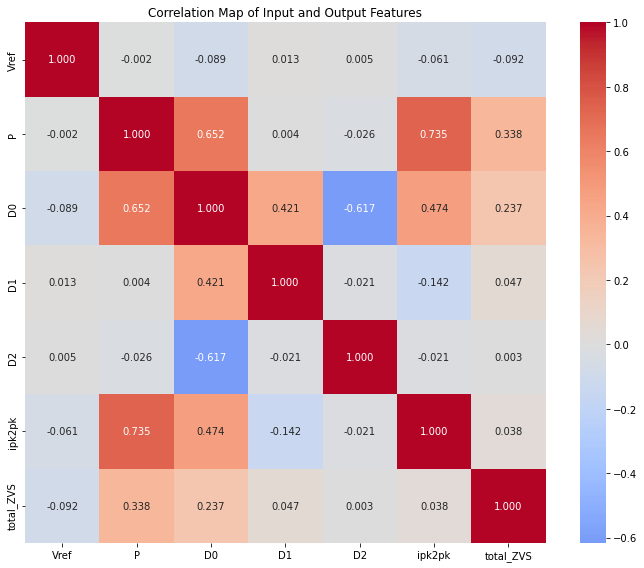

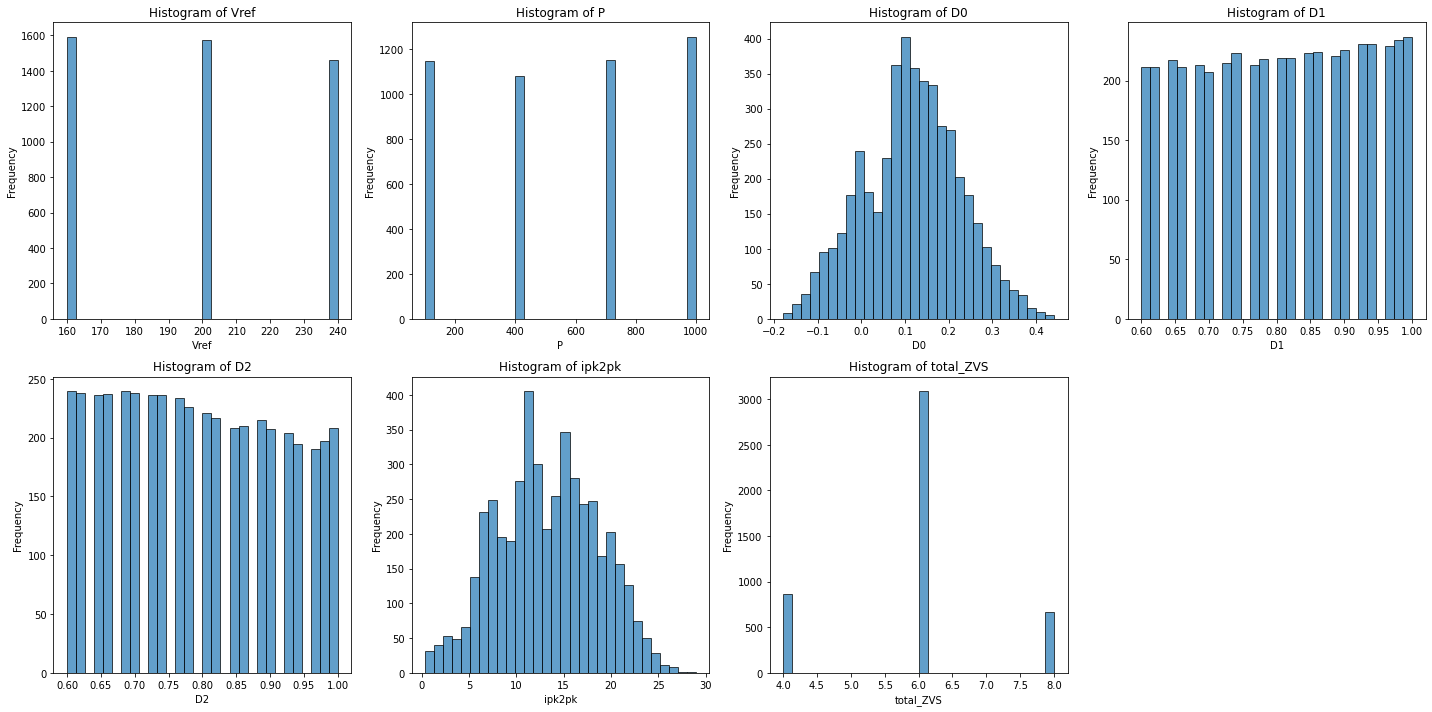

=== BASIC DATA ANALYSIS ===
Total number of samples: 4633

=== FEATURE STATISTICS ===
              Vref            P           D0           D1           D2  \
count  4633.000000  4633.000000  4633.000000  4633.000000  4633.000000   
mean    198.860350   562.788690     0.115350     0.804118     0.791604   
std      32.470202   340.236625     0.107296     0.121462     0.120520   
min     160.000000   100.000000    -0.178947     0.600000     0.600000   
25%     160.000000   400.000000     0.040641     0.700000     0.680000   
50%     200.000000   700.000000     0.119363     0.800000     0.780000   
75%     240.000000  1000.000000     0.181829     0.920000     0.900000   
max     240.000000  1000.000000     0.440729     1.000000     1.000000   

            ipk2pk    total_ZVS  
count  4633.000000  4633.000000  
mean     13.303469     5.915821  
std       5.266241     1.149751  
min       0.368701     4.000000  
25%       9.556965     6.000000  
50%      13.193537     6.000000  
75%      

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features we want to analyze
input_features = ["Vref", "P", "D0", "D1", "D2"]
output_features = ["ipk2pk", "total_ZVS"]
all_features = input_features + output_features

#------------------------------------------------------------------------------------------------
# Conduct basic data analysis, including correlation map, histograms, feature ranges, etc.
#------------------------------------------------------------------------------------------------
from utils import plot_correlation_map, plot_feature_histograms, basic_statistical_analysis

# 1. Correlation Map
plot_correlation_map(df_final, all_features)

# 2. Histograms for each feature
plot_feature_histograms(df_final, all_features)

# 3. Basic Statistical Analysis
basic_statistical_analysis(df_final, all_features)


#### 1.2 Basic Exploratory Data Analysis: Visualize Data Distribution with t-SNE

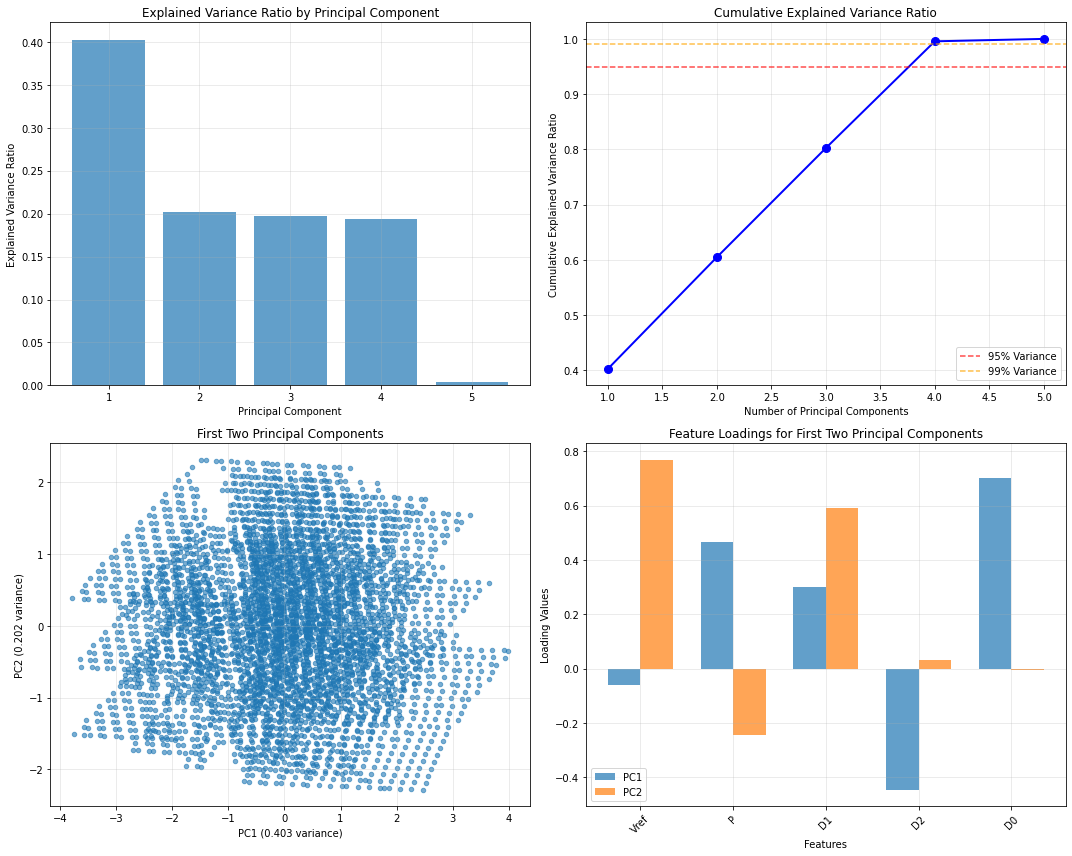

=== PCA ANALYSIS RESULTS ===
Features used: ['Vref', 'P', 'D1', 'D2', 'D0']

Explained variance ratio:
PC1: 0.4025 (40.25%)
PC2: 0.2022 (20.22%)
PC3: 0.1976 (19.76%)
PC4: 0.1933 (19.33%)
PC5: 0.0044 (0.44%)

Cumulative explained variance:
PC1-PC1: 0.4025 (40.25%)
PC1-PC2: 0.6048 (60.48%)
PC1-PC3: 0.8023 (80.23%)
PC1-PC4: 0.9956 (99.56%)
PC1-PC5: 1.0000 (100.00%)

Number of components needed for:
95% variance: 4
99% variance: 4

Feature loadings for PC1:
Vref: -0.0609
P: 0.4644
D1: 0.3015
D2: -0.4455
D0: 0.7009

Feature loadings for PC2:
Vref: 0.7690
P: -0.2454
D1: 0.5895
D2: 0.0316
D0: -0.0040


In [5]:
# Perform PCA on the selected features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features for PCA
pca_features = ["Vref", "P", "D1", "D2", "D0"]
X_pca = df_final[pca_features]

#------------------------------------------------------------------------------------------------
# Conduct PCA analysis, remember to standardize the features first
#------------------------------------------------------------------------------------------------

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

from utils import plot_and_summarize_pca_results

plot_and_summarize_pca_results(
    explained_variance_ratio,
    cumulative_variance_ratio,
    X_pca_transformed,
    pca,
    pca_features
)


Computing t-SNE for input features...
Computing t-SNE for output features...
Computing t-SNE for combined features...
Plotting t-SNE analysis...


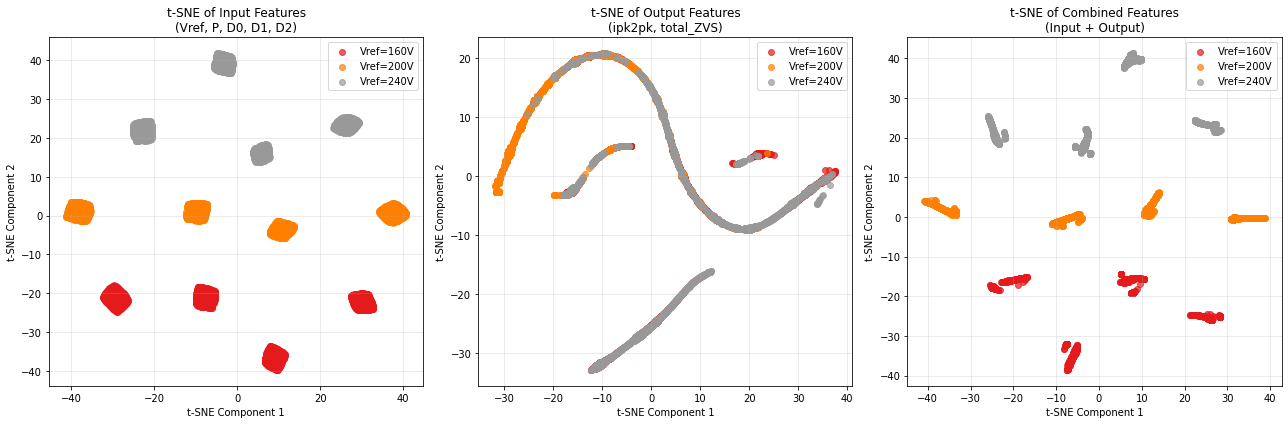


=== t-SNE ANALYSIS SUMMARY ===
Input features: ['Vref', 'P', 'D0', 'D1', 'D2']
Output features: ['ipk2pk', 'total_ZVS']
Combined features: ['Vref', 'P', 'D0', 'D1', 'D2', 'ipk2pk', 'total_ZVS']
Number of samples: 4633
Voltage levels found: [160, 200, 240]


In [6]:
# t-SNE Visualization for Input, Output, and Combined Features
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for t-SNE
input_data = df_final[input_features].values
output_data = df_final[output_features].values
combined_data = df_final[input_features + output_features].values

# Get unique voltage levels for coloring
voltage_levels = df_final['Vref'].unique()
voltage_colors = plt.cm.Set1(np.linspace(0, 1, len(voltage_levels)))
voltage_color_map = dict(zip(voltage_levels, voltage_colors))

#------------------------------------------------------------------------------------------------
# Conduct t-SNE analysis, including 1) input, 2) output, and 3) combined features
#------------------------------------------------------------------------------------------------

# 1. t-SNE for Input Features
print("Computing t-SNE for input features...")
tsne_input = TSNE(n_components=2, random_state=42, perplexity=200)
input_tsne = tsne_input.fit_transform(input_data)

# 2. t-SNE for Output Features
print("Computing t-SNE for output features...")
tsne_output = TSNE(n_components=2, random_state=42, perplexity=200)
output_tsne = tsne_output.fit_transform(output_data)

# 3. t-SNE for Combined Features
print("Computing t-SNE for combined features...")
tsne_combined = TSNE(n_components=2, random_state=42, perplexity=200)
combined_tsne = tsne_combined.fit_transform(combined_data)

# import the function to plot the t-SNE analysis
from utils import plot_tsne_analysis

print("Plotting t-SNE analysis...")
# plot the t-SNE analysis
plot_tsne_analysis(
    df_final,
    voltage_levels,
    voltage_color_map,
    input_tsne,
    output_tsne,
    combined_tsne,
    input_features,
    output_features,
)

Plotting t-SNE analysis...


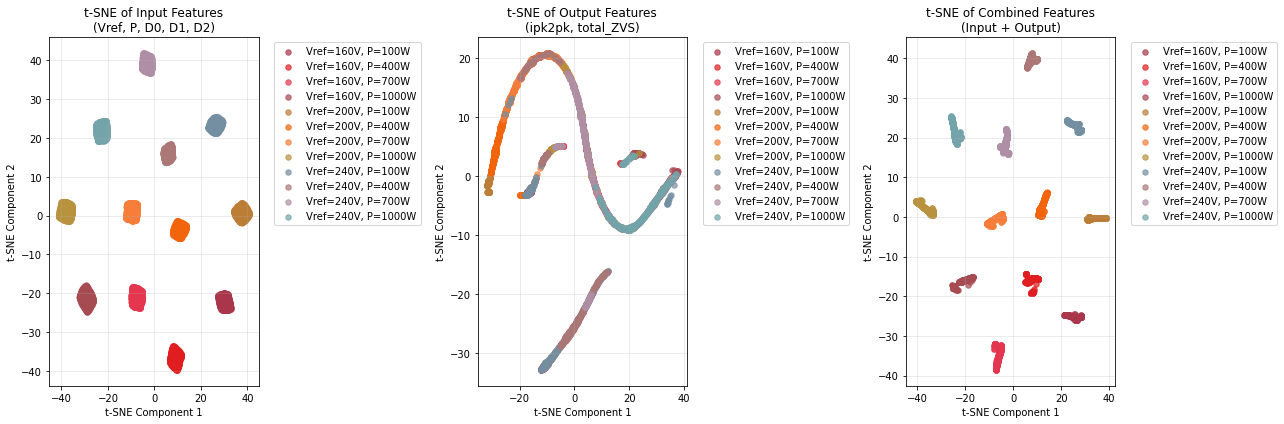


=== t-SNE ANALYSIS SUMMARY ===
Input features: ['Vref', 'P', 'D0', 'D1', 'D2']
Output features: ['ipk2pk', 'total_ZVS']
Combined features: ['Vref', 'P', 'D0', 'D1', 'D2', 'ipk2pk', 'total_ZVS']
Number of samples: 4633
Voltage levels found: [160, 200, 240]
Power levels found: [100, 400, 700, 1000]


In [7]:
# t-SNE Visualization for Input, Output, and Combined Features
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for t-SNE
input_data = df_final[input_features].values
output_data = df_final[output_features].values
combined_data = df_final[input_features + output_features].values

#------------------------------------------------------------------------------------------------
# Use unique voltage and power levels to color the t-SNE analysis
#------------------------------------------------------------------------------------------------

# Get unique voltage levels and power levels for coloring
voltage_levels = df_final['Vref'].unique()
power_levels = df_final['P'].unique()
voltage_colors = plt.cm.Set1(np.linspace(0, 1, len(voltage_levels)))
power_colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))
voltage_color_map = dict(zip(voltage_levels, voltage_colors))
power_color_map = dict(zip(power_levels, power_colors))

# import the function to plot the t-SNE analysis
from utils import plot_tsne_analysis

print("Plotting t-SNE analysis...")
# plot the t-SNE analysis, colored by voltage and power levels
plot_tsne_analysis(
    df_final,
    voltage_levels,
    voltage_color_map,
    input_tsne,
    output_tsne,
    combined_tsne,
    input_features,
    output_features,
    power_levels=power_levels,
    power_color_map=power_color_map
)


### 2. Current Stress Modeling as a Regression Problem

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


#------------------------------------------------------------------------------------------------
# Define the neural network architecture
#------------------------------------------------------------------------------------------------

# Define the neural network architecture
class CurrentStressMLP(nn.Module):
    def __init__(self, input_size=4):
        super(CurrentStressMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.layer2 = nn.Linear(32, 1)
        
        #------------------------------------------------------------------------------------------------
        # Change the activation function and explore the prediction landscape of the model
        #------------------------------------------------------------------------------------------------
        # self.relu = nn.ReLU()
        # use sigmoid for nonlinear behavior
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.bn1(self.layer1(x)))
        # x = self.relu(self.bn1(self.layer1(x)))
        x = self.layer2(x)
        return x

# Custom dataset class
class CurrentStressDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y).reshape(-1, 1)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Prepare the data
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "ipk2pk"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

#------------------------------------------------------------------------------------------------
# Feature scaling or normalization is important for the training of the neural network
#------------------------------------------------------------------------------------------------
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create datasets and dataloaders
train_dataset = CurrentStressDataset(X_train_scaled, y_train)
test_dataset = CurrentStressDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize the model
model_NN_regression = CurrentStressMLP(input_size=len(input_features))
criterion = nn.MSELoss()
optimizer = optim.Adam(model_NN_regression.parameters(), lr=0.01)  # Higher initial learning rate


#------------------------------------------------------------------------------------------------
# Use a learning rate scheduler to adjust the learning rate during training, improving the training process
#------------------------------------------------------------------------------------------------
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.5)  # Reduce LR every 200 epochs

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

print("Training the neural network...")
for epoch in range(num_epochs):
    # Training phase
    model_NN_regression.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_NN_regression(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        #------------------------------------------------------------------------------------------------
        # Gradient clipping/z-scoring is an important technique for the training of the neural network, especially for deep neural networks
        #------------------------------------------------------------------------------------------------
        # Z-score the gradients
        for param in model_NN_regression.parameters():
            if param.grad is not None:
                grad_mean = param.grad.mean()
                grad_std = param.grad.std()
                if grad_std > 0:
                    param.grad = (param.grad - grad_mean) / grad_std
        
        optimizer.step()
        train_loss += loss.item()
    
    # Update learning rate
    scheduler.step()
    
    # Validation phase
    model_NN_regression.eval() # set the model to evaluation mode, don't forget this
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model_NN_regression(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))
    
    if (epoch + 1) % 20 == 0:
        current_lr = scheduler.get_last_lr()[0]
        print(f'Epoch [{epoch+1}/{num_epochs}], LR: {current_lr:.6f}, Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}')


Training the neural network...


C:\Temp/ipykernel_21160/2433897784.py:109: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1808.)
  grad_std = param.grad.std()


Epoch [20/1000], LR: 0.010000, Train Loss: 151.689392, Test Loss: 149.954651
Epoch [40/1000], LR: 0.010000, Train Loss: 75.180889, Test Loss: 72.810651
Epoch [60/1000], LR: 0.010000, Train Loss: 17.828593, Test Loss: 16.848564
Epoch [80/1000], LR: 0.010000, Train Loss: 11.898438, Test Loss: 11.939575
Epoch [100/1000], LR: 0.010000, Train Loss: 10.338434, Test Loss: 10.406703
Epoch [120/1000], LR: 0.010000, Train Loss: 8.176844, Test Loss: 8.293812
Epoch [140/1000], LR: 0.010000, Train Loss: 6.166850, Test Loss: 6.090926
Epoch [160/1000], LR: 0.010000, Train Loss: 4.396591, Test Loss: 4.406709
Epoch [180/1000], LR: 0.010000, Train Loss: 3.167034, Test Loss: 3.185538
Epoch [200/1000], LR: 0.005000, Train Loss: 2.489305, Test Loss: 2.525611
Epoch [220/1000], LR: 0.005000, Train Loss: 2.267267, Test Loss: 2.320727
Epoch [240/1000], LR: 0.005000, Train Loss: 2.127260, Test Loss: 2.162001
Epoch [260/1000], LR: 0.005000, Train Loss: 1.997230, Test Loss: 2.054531
Epoch [280/1000], LR: 0.005000


=== MODEL PERFORMANCE ===
Mean Squared Error: 1.371182
Root Mean Squared Error: 1.170975
R² Score: 0.951047


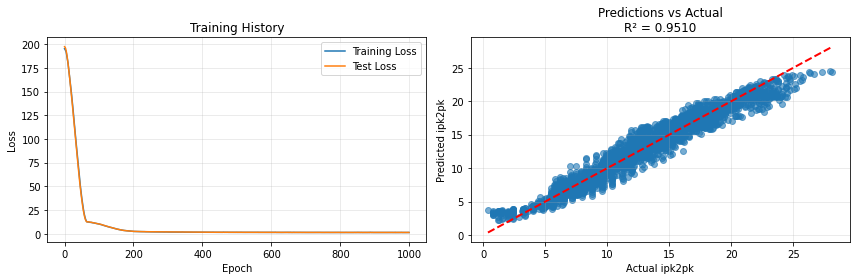

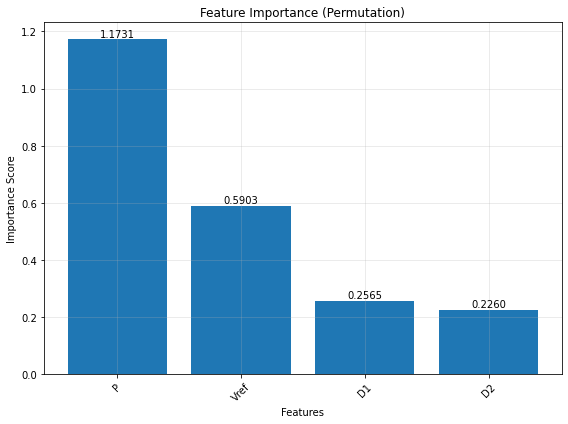


=== FEATURE IMPORTANCE ===
P: 1.173068
Vref: 0.590274
D1: 0.256450
D2: 0.225971


In [9]:
# Evaluate the model
model_NN_regression.eval()
with torch.no_grad():
    y_pred = model_NN_regression(torch.FloatTensor(X_test_scaled)).numpy().flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#------------------------------------------------------------------------------------------------
# Plot and report the model performance
#------------------------------------------------------------------------------------------------
from utils import plot_and_report_model_performance

plot_and_report_model_performance(
    mse, rmse, r2,
    train_losses, test_losses,
    y_test, y_pred,
    model_NN_regression, X_test_scaled, input_features
)


=== 3D MESH PLOT ===
Generating 3D mesh plot of current stress vs D1 and D2 (P=100, Vref=240)...


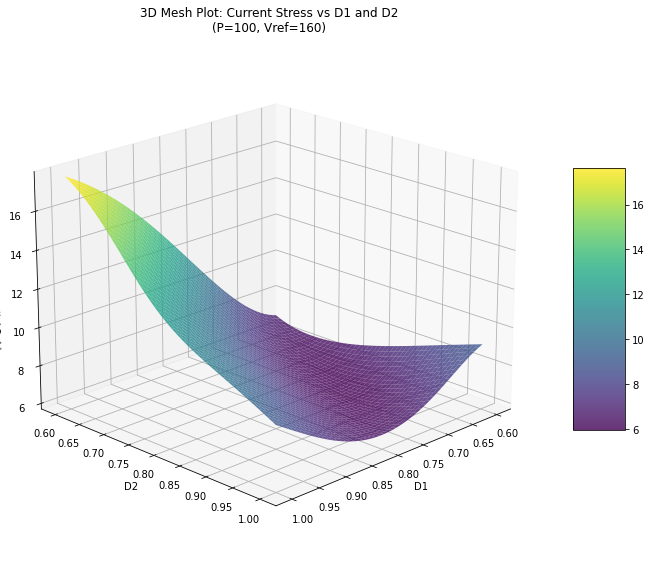

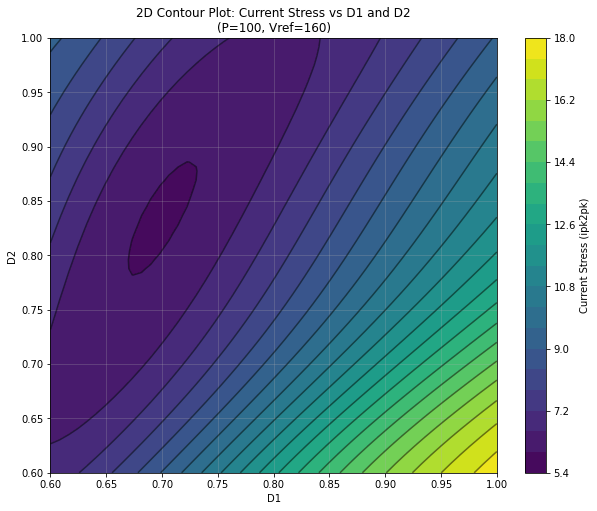

In [10]:
# 3D Mesh plot of current stress with respect to D1 and D2
print(f"\n=== 3D MESH PLOT ===")
print("Generating 3D mesh plot of current stress vs D1 and D2 (P=100, Vref=240)...")

# Create meshgrid for D1 and D2
D1_range = np.linspace(X_test_scaled[:, 2].min(), X_test_scaled[:, 2].max(), 50)  # D1 is at index 2
D2_range = np.linspace(X_test_scaled[:, 3].min(), X_test_scaled[:, 3].max(), 50)  # D2 is at index 3
D1_mesh, D2_mesh = np.meshgrid(D1_range, D2_range)

# Fixed values for P and Vref (scaled)
P_fixed = 100
Vref_fixed = 160

# Transform the fixed values using the same scaler
P_scaled = scaler.transform([[P_fixed, 0, 0, 0]])[0, 0]  # Get P value
Vref_scaled = scaler.transform([[0, Vref_fixed, 0, 0]])[0, 1]  # Get Vref value

#------------------------------------------------------------------------------------------------
# Create a 3D mesh plot of the current stress vs D1 and D2
#------------------------------------------------------------------------------------------------

# Create input array for prediction
X_contour = np.zeros((D1_mesh.size, 4))
X_contour[:, 0] = P_scaled  # P (fixed) - index 0
X_contour[:, 1] = Vref_scaled  # Vref (fixed) - index 1
X_contour[:, 2] = D1_mesh.flatten()  # D1 - index 2
X_contour[:, 3] = D2_mesh.flatten()  # D2 - index 3

# Predict current stress
model_NN_regression.eval()
with torch.no_grad():
    stress_pred = model_NN_regression(torch.FloatTensor(X_contour)).numpy().flatten()

# Reshape predictions back to meshgrid shape
stress_mesh = stress_pred.reshape(D1_mesh.shape)

# Inverse transform D1 and D2 back to original scale
D1_original = np.zeros((D1_mesh.size, 4))
D1_original[:, 2] = D1_mesh.flatten()  # Set D1 values
D1_original = scaler.inverse_transform(D1_original)
D1_original = D1_original[:, 2].reshape(D1_mesh.shape)


D2_original = np.zeros((D2_mesh.size, 4))
D2_original[:, 3] = D2_mesh.flatten()  # Set D2 values
D2_original = scaler.inverse_transform(D2_original)
D2_original = D2_original[:, 3].reshape(D2_mesh.shape)

#------------------------------------------------------------------------------------------------
# Plot the 3D mesh and 2D contour plot of the current stress
#------------------------------------------------------------------------------------------------
from utils import plot_stress_mesh_and_contour

plot_stress_mesh_and_contour(D1_original, D2_original, stress_mesh, 
                                 mesh_title=f'3D Mesh Plot: Current Stress vs D1 and D2\n(P={P_fixed}, Vref={Vref_fixed})', 
                                 contour_title=f'2D Contour Plot: Current Stress vs D1 and D2\n(P={P_fixed}, Vref={Vref_fixed})')

### 3. Zero Voltage Switching Modeling as a Classification Problem

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------------
# Define the neural network architecture for ZVS classification
#------------------------------------------------------------------------------------------------

# Define the neural network architecture for ZVS classification
class ZVSClassificationMLP(nn.Module):
    def __init__(self, input_size=4, num_classes=3):  # Assuming 3 classes for ZVS
        super(ZVSClassificationMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, 16)
        self.bn1 = nn.BatchNorm1d(16)
        self.layer2 = nn.Linear(16, num_classes)
        #------------------------------------------------------------------------------------------------
        # Change the activation function and explore the classification boundary of the model
        #------------------------------------------------------------------------------------------------
        self.relu = nn.ReLU()
        # use sigmoid for nonlinear behavior
        # self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.bn1(self.layer1(x)))
        # x = self.sigmoid(self.bn1(self.layer1(x)))
        x = self.layer2(x)
        return x

# Custom dataset class for ZVS classification
class ZVSClassificationDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        # Convert to long tensor for classification labels
        self.y = torch.LongTensor(y)
        # Create a mapping to regulate feature values in total_ZVS (4, 6, 8) to num_classes-1
        self.map_y = {4: 0, 6: 1, 8: 2}  # Map 4->0, 6->1, 8->2 for 3 classes (0,1,2)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        # Convert tensor to scalar for dictionary lookup
        y_value = self.y[idx].item()
        # Convert the target value to the corresponding class index
        return self.X[idx], self.map_y[y_value]

# Prepare the data for ZVS classification
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "total_ZVS"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

#------------------------------------------------------------------------------------------------
# Feature scaling or normalization is important for the training of the neural network
#------------------------------------------------------------------------------------------------
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create datasets and dataloaders
train_dataset = ZVSClassificationDataset(X_train_scaled, y_train)
test_dataset = ZVSClassificationDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize the model for classification
num_classes = len(np.unique(y))
model_NN_classification = ZVSClassificationMLP(input_size=len(input_features), num_classes=num_classes)

#------------------------------------------------------------------------------------------------
# Model head of classification is a softmax layer, which is used to convert the output of the model to a probability distribution
#------------------------------------------------------------------------------------------------
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model_NN_classification.parameters(), lr=0.01)  # Higher initial learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.5)  # Reduce LR every 200 epochs

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

print("Training the ZVS classification neural network...")
for epoch in range(num_epochs):
    # Training phase
    model_NN_classification.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_NN_classification(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        # Z-score the gradients
        for param in model_NN_classification.parameters():
            if param.grad is not None:
                grad_mean = param.grad.mean()
                grad_std = param.grad.std()
                if grad_std > 0:
                    param.grad = (param.grad - grad_mean) / grad_std
        
        optimizer.step()
        train_loss += loss.item()
    
    # Update learning rate
    scheduler.step()
    
    # Validation phase
    model_NN_classification.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model_NN_classification(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))
    
    if (epoch + 1) % 20 == 0:
        current_lr = scheduler.get_last_lr()[0]
        print(f'Epoch [{epoch+1}/{num_epochs}], LR: {current_lr:.6f}, Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}')


Training the ZVS classification neural network...
Epoch [20/1000], LR: 0.010000, Train Loss: 0.579807, Test Loss: 0.564042
Epoch [40/1000], LR: 0.010000, Train Loss: 0.435375, Test Loss: 0.420639
Epoch [60/1000], LR: 0.010000, Train Loss: 0.306164, Test Loss: 0.295388
Epoch [80/1000], LR: 0.010000, Train Loss: 0.252767, Test Loss: 0.241069
Epoch [100/1000], LR: 0.010000, Train Loss: 0.218711, Test Loss: 0.210376
Epoch [120/1000], LR: 0.010000, Train Loss: 0.194690, Test Loss: 0.188665
Epoch [140/1000], LR: 0.010000, Train Loss: 0.184114, Test Loss: 0.176407
Epoch [160/1000], LR: 0.010000, Train Loss: 0.168461, Test Loss: 0.166187
Epoch [180/1000], LR: 0.010000, Train Loss: 0.157393, Test Loss: 0.159952
Epoch [200/1000], LR: 0.005000, Train Loss: 0.147733, Test Loss: 0.152709
Epoch [220/1000], LR: 0.005000, Train Loss: 0.146373, Test Loss: 0.151298
Epoch [240/1000], LR: 0.005000, Train Loss: 0.145697, Test Loss: 0.146174
Epoch [260/1000], LR: 0.005000, Train Loss: 0.136560, Test Loss: 0


=== ZVS CLASSIFICATION MODEL PERFORMANCE ===
Accuracy: 0.949281
Precision: 0.948693
Recall: 0.949281
F1-Score: 0.948359


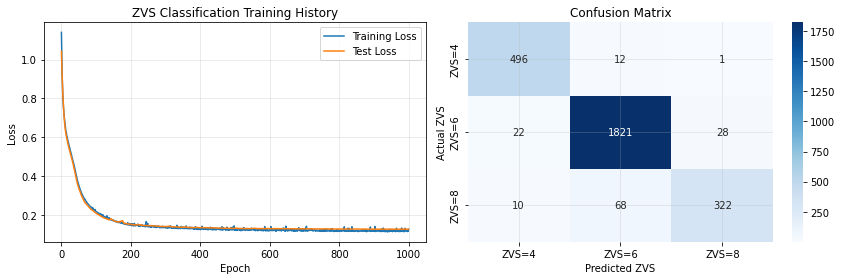

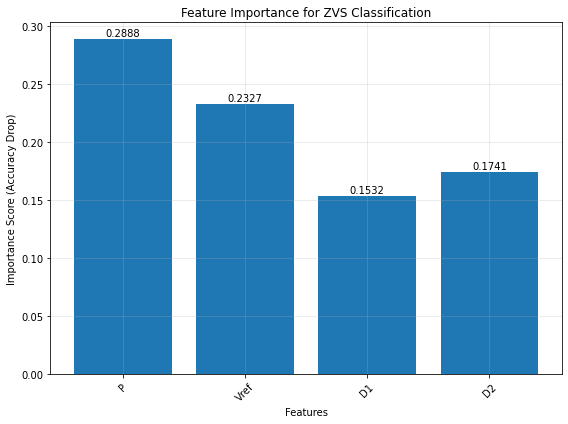


=== FEATURE IMPORTANCE FOR ZVS CLASSIFICATION ===
P: 0.288849
Vref: 0.232734
D1: 0.153237
D2: 0.174101

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       ZVS=4       0.94      0.97      0.96       509
       ZVS=6       0.96      0.97      0.97      1871
       ZVS=8       0.92      0.81      0.86       400

    accuracy                           0.95      2780
   macro avg       0.94      0.92      0.93      2780
weighted avg       0.95      0.95      0.95      2780



In [12]:
# Import required metrics from sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Evaluate the ZVS classification model
model_NN_classification.eval()
with torch.no_grad():
    y_pred_probs = model_NN_classification(torch.FloatTensor(X_test_scaled))
    y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Apply the same mapping to y_test as used in the dataset
map_y = {4: 0, 6: 1, 8: 2}  # Map 4->0, 6->1, 8->2 for 3 classes (0,1,2)
y_test_mapped = np.array([map_y[y] for y in y_test])

# Calculate classification metrics
accuracy = accuracy_score(y_test_mapped, y_pred_classes)
precision = precision_score(y_test_mapped, y_pred_classes, average='weighted')
recall = recall_score(y_test_mapped, y_pred_classes, average='weighted')
f1 = f1_score(y_test_mapped, y_pred_classes, average='weighted')

print(f"\n=== ZVS CLASSIFICATION MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")

#------------------------------------------------------------------------------------------------
# Plot the classification results
#------------------------------------------------------------------------------------------------
from utils import plot_classification_results

plot_classification_results(
    train_losses,
    test_losses,
    y_test_mapped,
    y_pred_classes,
    model_NN_classification,
    X_test_scaled,
    input_features
)



=== 2D ZVS CLASSIFICATION PLOT ===
Generating 2D plot of ZVS classification vs D1 and D2 (P=100, Vref=240)...


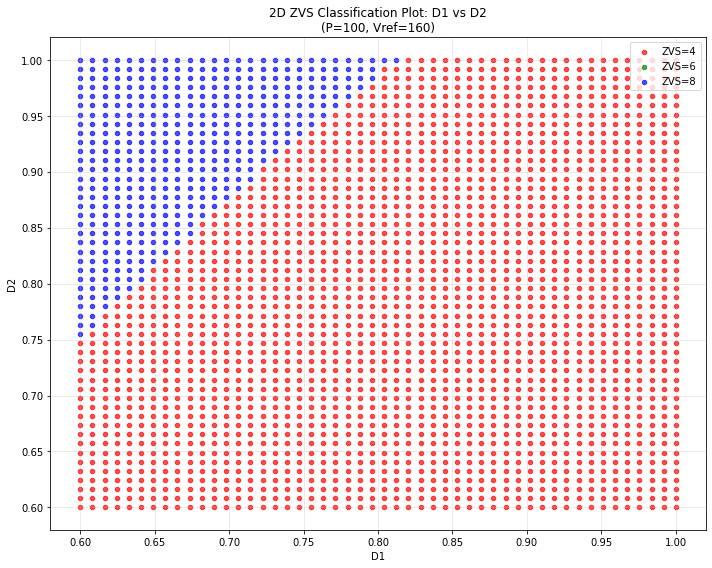

In [13]:
print(f"\n=== 2D ZVS CLASSIFICATION PLOT ===")
print("Generating 2D plot of ZVS classification vs D1 and D2 (P=100, Vref=240)...")

#------------------------------------------------------------------------------------------------
# Create a 2D plot of ZVS classification with respect to the meshgrid of D1 and D2
#------------------------------------------------------------------------------------------------

# Create meshgrid for D1 and D2
D1_range = np.linspace(X_test_scaled[:, 2].min(), X_test_scaled[:, 2].max(), 50)  # D1 is at index 2
D2_range = np.linspace(X_test_scaled[:, 3].min(), X_test_scaled[:, 3].max(), 50)  # D2 is at index 3
D1_mesh, D2_mesh = np.meshgrid(D1_range, D2_range)

# Fixed values for P and Vref (scaled)
P_fixed = 100
Vref_fixed = 160

# Transform the fixed values using the same scaler
P_scaled = scaler.transform([[P_fixed, 0, 0, 0]])[0, 0]  # Get P value
Vref_scaled = scaler.transform([[0, Vref_fixed, 0, 0]])[0, 1]  # Get Vref value

# Create input array for prediction
X_contour = np.zeros((D1_mesh.size, 4))
X_contour[:, 0] = P_scaled  # P (fixed) - index 0
X_contour[:, 1] = Vref_scaled  # Vref (fixed) - index 1
X_contour[:, 2] = D1_mesh.flatten()  # D1 - index 2
X_contour[:, 3] = D2_mesh.flatten()  # D2 - index 3

# Predict ZVS classification
model_NN_classification.eval()
with torch.no_grad():
    zvs_pred = torch.argmax(model_NN_classification(torch.FloatTensor(X_contour)), dim=1).numpy()

# Reshape predictions back to meshgrid shape
zvs_mesh = zvs_pred.reshape(D1_mesh.shape)

# Inverse transform D1 and D2 back to original scale
D1_original = np.zeros((D1_mesh.size, 4))
D1_original[:, 2] = D1_mesh.flatten()  # Set D1 values
D1_original = scaler.inverse_transform(D1_original)
D1_original = D1_original[:, 2].reshape(D1_mesh.shape)

D2_original = np.zeros((D2_mesh.size, 4))
D2_original[:, 3] = D2_mesh.flatten()  # Set D2 values
D2_original = scaler.inverse_transform(D2_original)
D2_original = D2_original[:, 3].reshape(D2_mesh.shape)

#------------------------------------------------------------------------------------------------
# Plot the 2D ZVS classification plot
#------------------------------------------------------------------------------------------------
from utils import plot_2d_zvs_classification

# plot the 2D ZVS classification plot
plot_2d_zvs_classification(D1_original, D2_original, zvs_mesh, P_fixed, Vref_fixed)

### 4. Benchmark with Any-Time Algorithms: Popular Ensemble Learning Algorithms
* Extreme Gradient Boosting (XGBoost)

d:\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Training the XGBoost model...
[15:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:13.73261
[1]	validation_0-rmse:13.60426
[2]	validation_0-rmse:13.47332
[3]	validation_0-rmse:13.34343
[4]	validation_0-rmse:13.22500
[5]	validation_0-rmse:13.10779
[6]	validation_0-rmse:12.98185
[7]	validation_0-rmse:12.85775
[8]	validation_0-rmse:12.73399
[9]	validation_0-rmse:12.61571
[10]	validation_0-rmse:12.49416
[11]	validation_0-rmse:12.37799
[12]	validation_0-rmse:12.25892
[13]	validation_0-rmse:12.15075
[14]	validation_0-rmse:12.03404
[15]	validation_0-rmse:11.91873
[16]	validation_0-rmse:11.80848
[17]	v

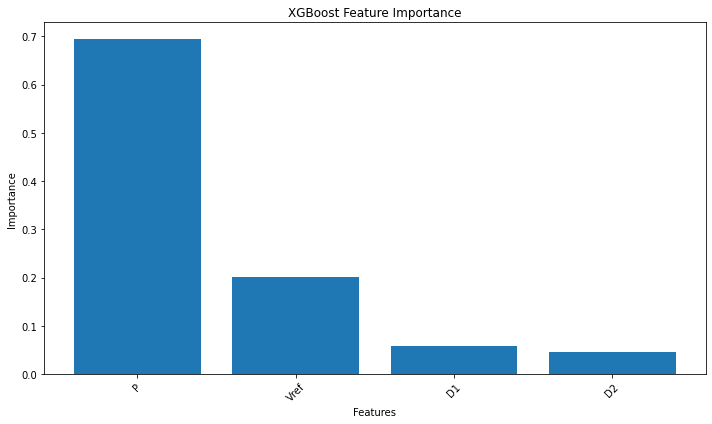

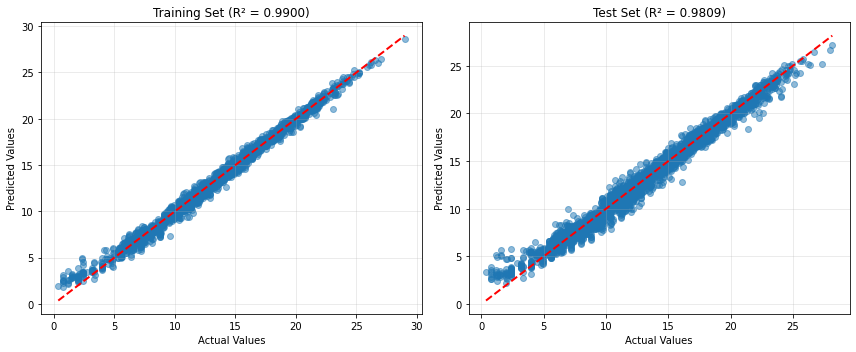

In [14]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "ipk2pk"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

#------------------------------------------------------------------------------------------------
# Use XGBoost to predict the current stress, not necessary to scale the features
#------------------------------------------------------------------------------------------------
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

# Training the XGBoost model
print("Training the XGBoost model...")
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=True
)

# Make predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nXGBoost Results:")
print(f"Train MSE: {train_mse:.6f}")
print(f"Test MSE: {test_mse:.6f}")
print(f"Train R²: {train_r2:.6f}")
print(f"Test R²: {test_r2:.6f}")

# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = input_features


#------------------------------------------------------------------------------------------------
# Plot the feature importance and predictions
#------------------------------------------------------------------------------------------------
from utils import plot_xgboost_feature_importance_and_predictions

plot_xgboost_feature_importance_and_predictions(
    feature_names=feature_names,
    feature_importance=feature_importance,
    y_train=y_train,
    y_train_pred=y_train_pred,
    train_r2=train_r2,
    y_test=y_test,
    y_test_pred=y_test_pred,
    test_r2=test_r2
)


Training the ZVS classification XGBoost model...
[15:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




d:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



=== XGBOOST ZVS CLASSIFICATION RESULTS ===
Training Accuracy: 0.995683
Test Accuracy: 0.934892


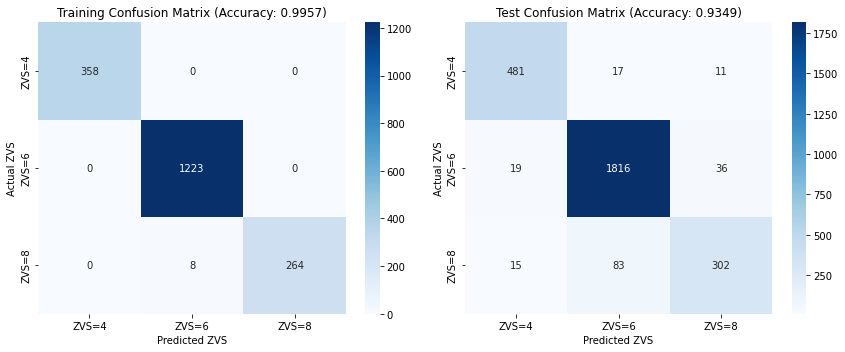

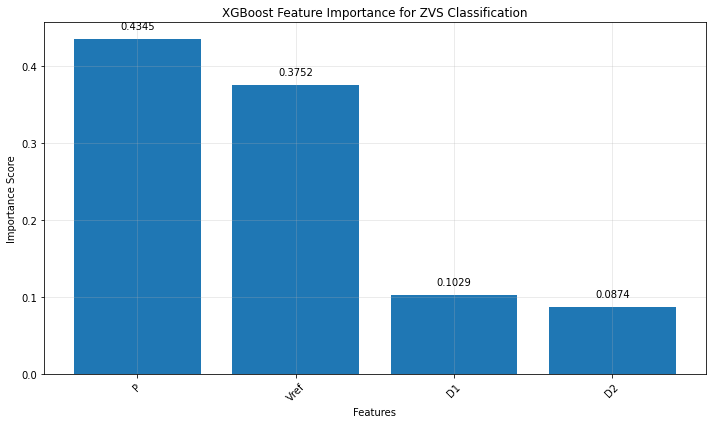


=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       ZVS=4       0.93      0.94      0.94       509
       ZVS=6       0.95      0.97      0.96      1871
       ZVS=8       0.87      0.76      0.81       400

    accuracy                           0.93      2780
   macro avg       0.92      0.89      0.90      2780
weighted avg       0.93      0.93      0.93      2780


=== FEATURE IMPORTANCE FOR ZVS CLASSIFICATION ===
P: 0.434528
Vref: 0.375192
D1: 0.102925
D2: 0.087356


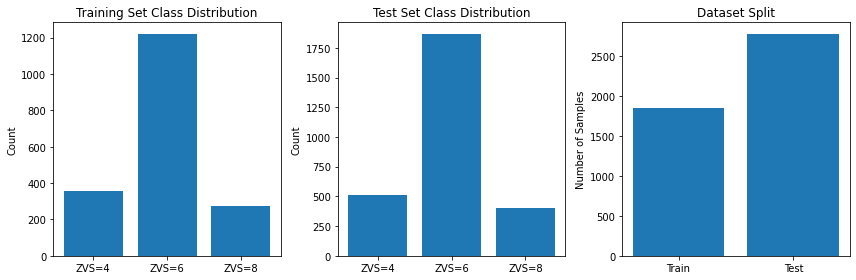


=== DATASET SUMMARY ===
Training samples: 1853
Test samples: 2780
Total samples: 4633
Number of classes: 3


In [15]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for ZVS classification
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "total_ZVS"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Create mapping for ZVS classes
map_y = {4: 0, 6: 1, 8: 2}  # Map 4->0, 6->1, 8->2 for 3 classes (0,1,2)
y_mapped = np.array([map_y[y_val] for y_val in y])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.6, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost classifier with optimized hyperparameters for class imbalance
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,          # Number of boosting rounds
    max_depth=6,                # Maximum depth of trees
    learning_rate=0.2,        # Learning rate (eta)
    random_state=42,
    eval_metric='merror',        # Multiclass classification error rate
    early_stopping_rounds=5,     # Early stopping to prevent overfitting
)

print("Training the ZVS classification XGBoost model...")
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = xgb_classifier.predict(X_train_scaled)
y_test_pred = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n=== XGBOOST ZVS CLASSIFICATION RESULTS ===")
print(f"Training Accuracy: {train_accuracy:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")

#------------------------------------------------------------------------------------------------
# Plot the classification results
#------------------------------------------------------------------------------------------------
from utils import classification_analysis

classification_analysis(
    y_train, y_train_pred, train_accuracy,
    y_test, y_test_pred, test_accuracy,
    xgb_classifier, input_features,
    y_mapped
)


### 5. Optimize the Phase Shift Angles across Operating Ranges

2025-07-12 15:15:41,232 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': (3.5, 0.5), 'c2': (0.5, 3.5), 'w': (0.9, 0.1), 'k': 20, 'p': 2}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=6.04
2025-07-12 15:15:41,968 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.03759241104126, best pos: [0.69485674 0.86943645]


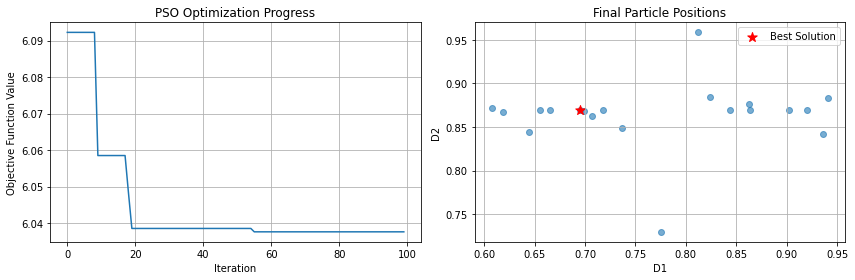


=== PSO OPTIMIZATION RESULTS ===
Best D1: 0.6949
Best D2: 0.8694
Best objective value: 6.0376
Optimized current stress: 6.0376
Target ZVS devices: 8


In [16]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import numpy as np
import matplotlib.pyplot as plt

# Set fixed parameters
P_fixed = 100
Vref_fixed = 160

#------------------------------------------------------------------------------------------------
# Define the objective function for PSO, which is the current stress + penalty for not having exactly 8 ZVS devices
#------------------------------------------------------------------------------------------------
def objective_function(positions):
    """
    Objective function for PSO optimization
    Minimize current stress while keeping ZVS devices = 8
    """
    n_particles = positions.shape[0]
    costs = np.zeros(n_particles)
    
    for i in range(n_particles):
        # Extract D1 and D2 from particle position
        D1, D2 = positions[i, 0], positions[i, 1]
        
        # Create input features for neural network
        X_input = np.array([[P_fixed, Vref_fixed, D1, D2]])
        
        # Scale the input using the same scaler from training
        X_input_scaled = scaler.transform(X_input)
        X_input_tensor = torch.FloatTensor(X_input_scaled)
        # Get predictions from both models
        model_NN_regression.eval()
        model_NN_classification.eval()
        with torch.no_grad():
            # Current stress prediction (regression)
            current_stress = model_NN_regression(X_input_tensor).squeeze().item()
            
            # ZVS prediction (classification) - using the classifier model
            zvs_output = model_NN_classification(X_input_tensor)
            zvs_prediction = torch.argmax(zvs_output, dim=1).item()
            # Map back from class index to actual ZVS value
            zvs_mapping = {0: 4, 1: 6, 2: 8}
            zvs_prediction = zvs_mapping[zvs_prediction]
        
        # Penalty for not having exactly 8 ZVS devices
        zvs_penalty = abs(zvs_prediction - 8) * 1000  # Large penalty for deviation
        
        # Total cost: current stress + penalty
        costs[i] = current_stress + zvs_penalty
    
    return costs

#------------------------------------------------------------------------------------------------
# Set up PSO optimizer with linearly decreasing weight inertia
#------------------------------------------------------------------------------------------------
options = {
    'c1': (3.5, 0.5),  # cognitive parameter
    'c2': (0.5, 3.5),  # social parameter
    'w': (0.9, 0.1),  # inertia parameter range (start, end) for linear decrease
    # 'c1': 2.05,  # cognitive parameter
    # 'c2': 2.05,  # social parameter
    # 'w': 0.9,  # inertia parameter range (start, end) for linear decrease
    'k': 20,     # number of neighbors
    'p': 2      # p-norm for distance calculation
}

# Initialize optimizer
optimizer = ps.single.GlobalBestPSO(
    n_particles=20,
    dimensions=2,  # D1 and D2
    options=options,
    bounds=([0.6, 0.6], [1, 1])  # Bounds for D1 and D2
)

# Run optimization
best_cost, best_pos = optimizer.optimize(
    objective_function,
    iters=100,
    verbose=True
)

#------------------------------------------------------------------------------------------------
# Plot the optimization results
#------------------------------------------------------------------------------------------------
from utils import plot_pso_optimization_results

plot_pso_optimization_results(optimizer, best_pos, best_cost)


#------------------------------------------------------------------------------------------------
# Evaluate the best solution
#------------------------------------------------------------------------------------------------
X_best = np.array([[P_fixed, Vref_fixed, best_pos[0], best_pos[1]]])
X_best_scaled = scaler.transform(X_best)
X_best_tensor = torch.FloatTensor(X_best_scaled)

model_NN_regression.eval()
model_NN_classification.eval()
with torch.no_grad():
    best_current_stress = model_NN_regression(X_best_tensor).item()
    best_zvs_prediction = model_NN_classification(X_best_tensor).argmax(dim=1).item()
    zvs_mapping = {0: 4, 1: 6, 2: 8}
    best_zvs_prediction = zvs_mapping[best_zvs_prediction]

print(f"Optimized current stress: {best_current_stress:.4f}")
print(f"Target ZVS devices: {best_zvs_prediction}")
